In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [ ]:
df = pd.read_csv('/content/sample_data/D3.csv')
print(df)
df.head() # To get first n rows from the dataset default value of n is 5 
M=len(df) 
M

          X1        X2        X3         Y
0   0.000000  3.440000  0.440000  4.387545
1   0.040404  0.134949  0.888485  2.679650
2   0.080808  0.829899  1.336970  2.968490
3   0.121212  1.524848  1.785455  3.254065
4   0.161616  2.219798  2.233939  3.536375
..       ...       ...       ...       ...
95  3.838384  1.460202  3.046061 -4.440595
96  3.878788  2.155152  3.494545 -4.458663
97  3.919192  2.850101  3.943030 -4.479995
98  3.959596  3.545051  0.391515 -3.304593
99  4.000000  0.240000  0.840000 -5.332455

[100 rows x 4 columns]


100

In [86]:
X2 = df.values[:,1] # get input values from X2 column
y = df.values[:, 3]  # get output values from Y column
m = len(y) # Number of training examples 
print('X2 = ', X2[: 5]) # Show only first 5 records 
print('y = ', y[: 5]) 


X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]


Text(0.5, 1.0, 'Scatter plot of training data for X2')

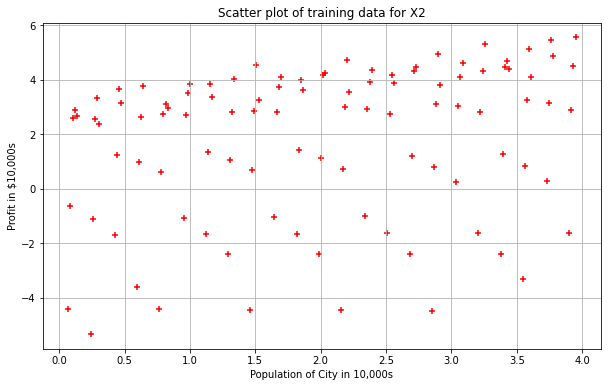

In [ ]:
plt.scatter(X2,y, color='red',marker= '+') 
plt.grid() 
plt.rcParams["figure.figsize"] = (10,6) 
plt.xlabel('Population of City in 10,000s') 
plt.ylabel('Profit in $10,000s') 
plt.title('Scatter plot of training data for X2') 

In [ ]:
#Lets create a matrix with single column of ones 
X_0 = np.ones((m, 1)) 
X_0[:5] 
X_2 = X2.reshape(m,1)
X_2[:10]
print('X_2:',X_2)

X_2: [[3.44      ]
 [0.1349495 ]
 [0.82989899]
 [1.52484848]
 [2.21979798]
 [2.91474747]
 [3.60969697]
 [0.30464646]
 [0.99959596]
 [1.69454546]
 [2.38949495]
 [3.08444444]
 [3.77939394]
 [0.47434343]
 [1.16929293]
 [1.86424242]
 [2.55919192]
 [3.25414141]
 [3.94909091]
 [0.6440404 ]
 [1.3389899 ]
 [2.03393939]
 [2.72888889]
 [3.42383838]
 [0.11878788]
 [0.81373737]
 [1.50868687]
 [2.20363636]
 [2.89858586]
 [3.59353535]
 [0.28848485]
 [0.98343434]
 [1.67838384]
 [2.37333333]
 [3.06828283]
 [3.76323232]
 [0.45818182]
 [1.15313131]
 [1.84808081]
 [2.5430303 ]
 [3.2379798 ]
 [3.93292929]
 [0.62787879]
 [1.32282828]
 [2.01777778]
 [2.71272727]
 [3.40767677]
 [0.10262626]
 [0.79757576]
 [1.49252525]
 [2.18747475]
 [2.88242424]
 [3.57737374]
 [0.27232323]
 [0.96727273]
 [1.66222222]
 [2.35717172]
 [3.05212121]
 [3.74707071]
 [0.4420202 ]
 [1.1369697 ]
 [1.83191919]
 [2.52686869]
 [3.22181818]
 [3.91676768]
 [0.61171717]
 [1.30666667]
 [2.00161616]
 [2.69656566]
 [3.39151515]
 [0.08646465]
 

In [ ]:
# Lets use hstack() function from numpy to stack X_0 and X_2 horizontally (i.e. column 
# This will be our final X matrix (feature matrix) 
X02 = np.hstack((X_0, X_2)) 
X02[:5] 

array([[1.        , 3.44      ],
       [1.        , 0.1349495 ],
       [1.        , 0.82989899],
       [1.        , 1.52484848],
       [1.        , 2.21979798]])

In [ ]:
theta = np.zeros(2) 
theta 

array([0., 0.])

In [ ]:
def compute_cost(X, y, theta): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(1 x m) 
 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
 
  Output Parameters 
  ----------------- 
  J : Scalar value. 
  """ 
  predictions = X.dot(theta) 
  errors = np.subtract(predictions, y) 
  sqrErrors = np.square(errors) 
  J = 1 / (2 * m) * np.sum(sqrErrors) 
 
  return J 

In [ ]:
# Lets compute the cost for theta values 
cost02 = compute_cost(X02, y, theta) 
print('The cost for given values of theta_0 and theta_1 =', cost02) 

The cost for given values of theta_0 and theta_1 = 5.524438459196242


In [ ]:
def gradient_descent(X, y, theta, alpha, iterations): 
  """ 
  Compute cost for linear regression. 
 
  Input Parameters 
  ---------------- 
  X : 2D array where each row represent the training example and each column represent 
      m= number of training examples 
      n= number of features (including X_0 column of ones) 
  y : 1D array of labels/target value for each traing example. dimension(m x 1) 
  theta : 1D array of fitting parameters or weights. Dimension (1 x n) 
  alpha : Learning rate. Scalar value 
  iterations: No of iterations. Scalar value.  
 
  Output Parameters 
  ----------------- 
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n) 
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)
   """ 
  cost_history = np.zeros(iterations) 
 
  for i in range(iterations): 
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, y) 
    sum_delta = (alpha / m) * X.transpose().dot(errors); 
    theta = theta - sum_delta; 
    cost_history[i] = compute_cost(X, y, theta)   
 
  return theta, cost_history 

In [ ]:
theta = [0., 0.] 
iterations = 1500; 
alpha = 0.001; 

In [ ]:
theta, cost_history02 = gradient_descent(X02, y, theta, alpha, iterations) 
print('Final value of theta =', theta) 
print('cost_history =', cost_history02)

Final value of theta = [0.41275557 0.68335862]
cost_history = [5.50118218 5.47821041 5.45551967 ... 3.61271034 3.61270443 3.61269852]


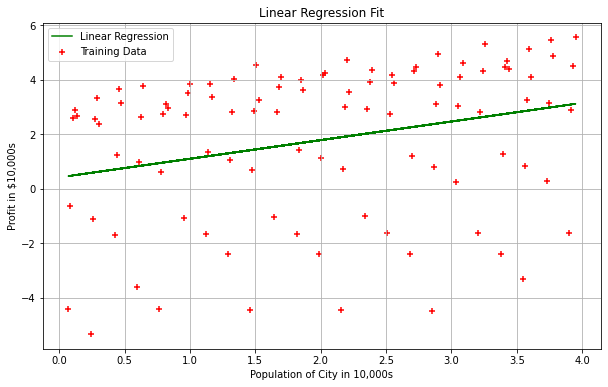

In [ ]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only 
plt.scatter(X02[:,1], y, color='red', marker= '+', label= 'Training Data') 
plt.plot(X02[:,1],X02.dot(theta), color='green', label='Linear Regression') 
 
plt.rcParams["figure.figsize"] = (10,6)
plt.grid() 
plt.xlabel('Population of City in 10,000s') 
plt.ylabel('Profit in $10,000s') 
plt.title('Linear Regression Fit') 
plt.legend() 

Text(0.5, 1.0, 'Convergence of gradient descent')

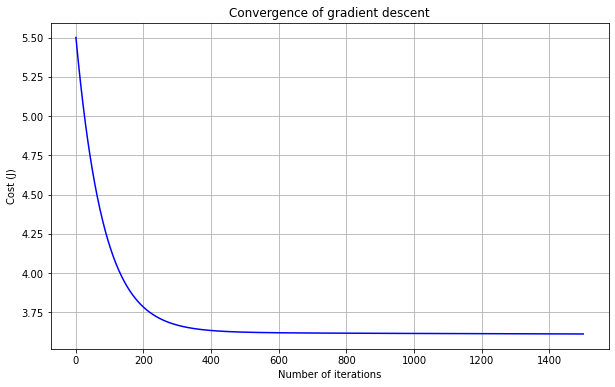

In [ ]:
plt.plot(range(1, iterations + 1),cost_history02, color='blue') 
plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 